# 1.

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

size_N = 1000
size_samples = 100

In [12]:
def sample_1(sample):
    return 2 * np.mean(sample)

def sample_2 (sample):
    return (sample.size + 1) * np.min(sample)

def sample_3 (sample):
    return np.min(sample) + np.max(sample)

def sample_4 (sample):
    return (sample.size + 1.) / sample.size * np.max(sample)

In [54]:
def estimate (func, sample, theta):
    y = np.array([], dtype=float)
    for k in range(1, size_N + 1):
        y = np.append(y, (func(sample[:k]) - theta) ** 2 )
    return y

In [70]:
def theta_sample (theta):
    n = np.arange(1, size_N + 1, dtype=int)
    distribution = [st.uniform(0, theta)] * size_samples
    y_1 = np.zeros(size_N)
    y_2 = np.zeros(size_N)
    y_3 = np.zeros(size_N)
    y_4 = np.zeros(size_N)
    
    for i in range(1, size_samples):
        distribution[i] = st.uniform(0, theta)
        sample = distribution[i].rvs(size = size_N)
        y_1 += estimate(sample_1, sample, theta) / i
        y_2 += estimate(sample_2, sample, theta) / i
        y_3 += estimate(sample_3, sample, theta) / i
        y_4 += estimate(sample_4, sample, theta) / i

    print("Построим усредненную функцию потерь для тета = ", theta)
    plt.plot(n, y_1, 'r')
    plt.plot(n, y_2, 'g')
    plt.plot(n, y_3, 'b')
    plt.plot(n, y_4, 'purple')
    plt.show()
    
    plt.plot(n, y_1, 'r')
    plt.plot(n, y_2, 'g')
    plt.plot(n, y_3, 'b')
    plt.plot(n, y_4, 'purple')
    plt.ylim([0, 2])
    plt.show()    
        

Построим усредненную функцию потерб для тета =  5


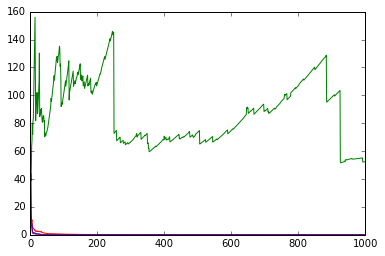

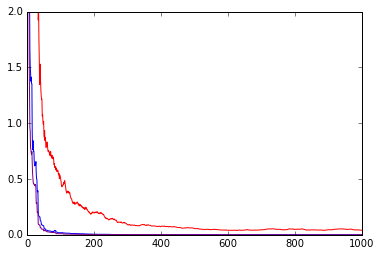

In [71]:
theta_sample(5)

Построим усредненную функцию потерб для тета =  10


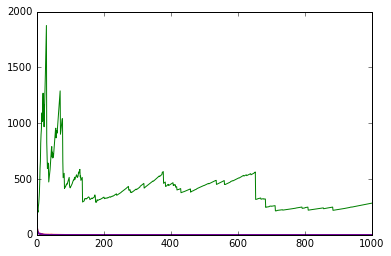

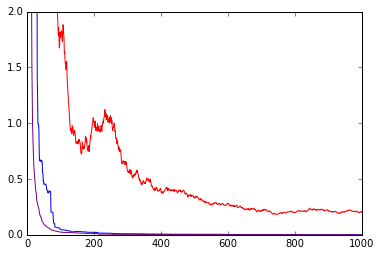

In [72]:
theta_sample(10)

Построим усредненную функцию потерб для тета =  25


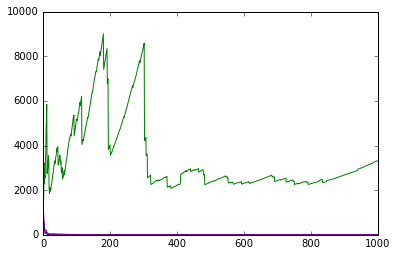

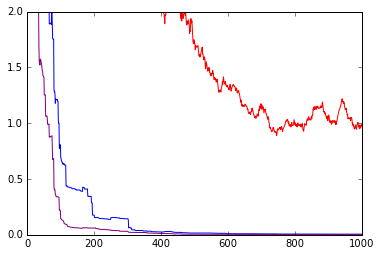

In [73]:
theta_sample(25)

Из графиков видно, что лучшая оценка изображена фиолетовым цветом - $\frac{n + 1}{n} \cdot X_{(n)}$